# Exploratory Data Analysis

## Import packages

In [128]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [129]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [130]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

NumPy 1.23.5
Pandas 2.0.1
Matplotlib 3.7.1
Seaborn 0.12.2


---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [131]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [132]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [133]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Data description

### Client data

| Feature Name                   | Description                                                                                           |
|--------------------------------|-------------------------------------------------------------------------------------------------------|
| id                             | Client company identifier                                                                             |
| activity_new                   | Category of the company’s activity                                                                    |
| channel_sales                  | Code of the sales channel                                                                             |
| cons_12m                       | Electricity consumption of the past 12 months                                                         |
| cons_gas_12m                   | Gas consumption of the past 12 months                                                                 |
| cons_last_month                | Electricity consumption of the last month                                                             |
| date_activ                     | Date of activation of the contract                                                                    |
| date_end                       | Registered date of the end of the contract                                                            |
| date_modif_prod                | Date of the last modification of the product                                                          |
| date_renewal                   | Date of the next contract renewal                                                                     |
| forecast_cons_12m              | Forecasted electricity consumption for the next 12 months                                             |
| forecast_cons_year             | Forecasted electricity consumption for the next calendar year                                         |
| forecast_discount_energy       | Forecasted value of current discount                                                                  |
| forecast_meter_rent_12m        | Forecasted bill of meter rental for the next 2 months                                                 |
| forecast_price_energy_off_peak | Forecasted energy price for 1st period (off peak)                                                     |
| forecast_price_energy_peak     | Forecasted energy price for 2nd period (peak)                                                         |
| forecast_price_pow_off_peak    | Forecasted power price for 1st period (off peak)                                                      |
| has_gas                        | Indicated if client is also a gas client                                                              |
| imp_cons                       | Current paid consumption                                                                              |
| margin_gross_pow_ele           | Gross margin on power subscription                                                                    |
| margin_net_pow_ele             | Net margin on power subscription                                                                      |
| nb_prod_act                    | Number of active products and services                                                                |
| net_margin                     | Total net margin                                                                                      |
| num_years_antig                | Antiquity of the client (in number of years)                                                          |
| origin_up                      | Code of the electricity campaign the customer first subscribed to                                     |
| pow_max                        | Subscribed power                                                                                      |
| churn                          | Has the client churned over the next 3 months                                                         |


### Price data

| Feature Name                   | Description                                                                                           |
|--------------------------------|-------------------------------------------------------------------------------------------------------|
| id                             | Client company identifier                                                                             |
| price_date                     | Reference date                                                                                        |
| price_off_peak_var             | Price of energy for the 1st period (off peak)                                                         |
| price_peak_var                 | Price of energy for the 2nd period (peak)                                                             |
| price_mid_peak_var             | Price of energy for the 3rd period (mid peak)                                                         |
| price_off_peak_fix             | Price of power for the 1st period (off peak)                                                          |
| price_peak_fix                 | Price of power for the 2nd period (peak)                                                              |
| price_mid_peak_fix             | Price of power for the 3rd period (mid peak)                                                          |


---

## Dimensions of data

In [134]:
client_df.shape

(14606, 26)

In [135]:
print('Client data dimension')
print(f'- Number of rows: {client_df.shape[0]}')
print(f'- Number of cols: {client_df.shape[1]}')

Client data dimension
- Number of rows: 14606
- Number of cols: 26


In [136]:
price_df.shape

(193002, 8)

In [137]:
print('Price data dimension')
print(f'- Number of rows: {price_df.shape[0]}')
print(f'- Number of cols: {price_df.shape[1]}')

Price data dimension
- Number of rows: 193002
- Number of cols: 8


---

## Descriptive statistics of data

### Data types of columns

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [138]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [139]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


- The features `date_activ`, `date_end`, `date_modif_prod`, and `date_renewal` should have the data type of datetime.
- The feature `has_gas` has binary values, which are 't' for True and 'f' for False, thus requiring binary encoding.

In [140]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


- The feature `price_date` should have the data type of datetime.

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [141]:
client_df.describe(percentiles=[.25, .50, .75, .85, .95])

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
85%,8.667500e+04,3.042000e+03,7254.000000,3603.697500,2975.250000,0.000000,132.550000,0.161454,0.100123,44.311378,321.005000,34.680000,34.672500,2.000000,367.290000,6.000000,24.150000,0.000000
95%,9.137718e+05,7.585400e+04,82161.500000,6127.095000,5968.750000,0.000000,145.720000,0.166178,0.101750,46.305378,638.817500,51.720000,51.720000,2.000000,587.685000,7.000000,41.500000,1.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [142]:
price_df.describe(percentiles=[.25, .50, .75, .85, .95])

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
85%,0.163081,0.104382,0.073935,44.444710,24.437330,16.291555
95%,0.170590,0.107161,0.076257,46.444710,24.837586,16.291555
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### Number of unique values

In [143]:
def unique_values(dataframe):
    values = {'Feature Name': [],
              'Unique Values': [],
              'Total': []}

    for col in dataframe.columns:
        unique_vals = dataframe[col].unique()
        values['Feature Name'].append(col)
        values['Unique Values'].append(unique_vals)
        values['Total'].append(len(unique_vals))

    return pd.DataFrame(values)

In [144]:
unique_values(client_df)

,Feature Name,Unique Values,Total
0,id,"[24011ae4ebbe3035111d65fa7c15bc57, d29c2c54acc...",14606
1,channel_sales,"[foosdfpfkusacimwkcsosbicdxkicaua, MISSING, lm...",8
2,cons_12m,"[0, 4660, 544, 1584, 4425, 8302, 45097, 29552,...",11065
3,cons_gas_12m,"[54946, 0, 1542867, 80583, 41883, 188601, 1868...",2112
4,cons_last_month,"[0, 526, 1998, 1260, 2188, 3112, 2489, 5280, 3...",4751
5,date_activ,"[2013-06-15, 2009-08-21, 2010-04-16, 2010-03-3...",1796
6,date_end,"[2016-06-15, 2016-08-30, 2016-04-16, 2016-03-3...",368
7,date_modif_prod,"[2015-11-01, 2009-08-21, 2010-04-16, 2010-03-3...",2129
8,date_renewal,"[2015-06-23, 2015-08-31, 2015-04-17, 2015-03-3...",386
9,forecast_cons_12m,"[0.0, 189.95, 47.96, 240.04, 445.75, 796.94, 8...",13993


In [145]:
client_df['channel_sales'].unique()

array(['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa'], dtype=object)

In [146]:
client_df[client_df['channel_sales'] == 'MISSING'].count()[0]

3725

In [147]:
client_df['origin_up'].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', 'MISSING',
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

In [148]:
client_df[client_df['origin_up'] == 'MISSING'].count()[0]

64

- The features `channel_sales` and `origin_up` have missing values with the value 'MISSING'.

In [149]:
unique_values(price_df)

,Feature Name,Unique Values,Total
0,id,"[038af19179925da21a25619c5a24b745, 31f2ce54992...",16096
1,price_date,"[2015-01-01, 2015-02-01, 2015-03-01, 2015-04-0...",12
2,price_off_peak_var,"[0.151367, 0.149626, 0.150321, 0.145859, 0.125...",1853
3,price_peak_var,"[0.0, 0.103395, 0.102234, 0.10524, 0.101071, 0...",1189
4,price_mid_peak_var,"[0.0, 0.071536, 0.070375, 0.07515, 0.075096, 0...",711
5,price_off_peak_fix,"[44.26693116, 44.26692996, 44.44470996, 40.565...",66
6,price_peak_fix,"[0.0, 24.33958068, 24.43733004, 24.33957804, 2...",31
7,price_mid_peak_fix,"[0.0, 16.22638872, 16.29155496, 16.22638296, 1...",28


In [150]:
price_df['price_date'].unique()

array(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
      dtype=object)

- The feature `price_date` has a data range from January 2015 to December 2015.

### Detect duplicate values

In [151]:
# Check the features that have duplicate values
print(client_df.duplicated().any())
client_df.duplicated().sum()

False


0

In [152]:
print(price_df.duplicated().any())
price_df.duplicated().sum()

False


0

### Detect missing values

In [153]:
def missing_values(dataframe):
    na = dataframe.isna().sum()
    na_percent = ((na / len(dataframe)) * 100).round(2)
    na_df = pd.DataFrame({'Feature Name': na.index,
                          'Total': na.values,
                          'Percentage (%)': na_percent.values})
    na_df = na_df[na_df['Percentage (%)'] > 0].reset_index(drop=True)
    return na_df

In [154]:
# Check the features that have missing values
print(client_df.isna().values.any())
missing_values(client_df)

False


,Feature Name,Total,Percentage (%)


In [155]:
print(price_df.isna().values.any())
missing_values(price_df)

False


,Feature Name,Total,Percentage (%)


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [156]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.025, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

The first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

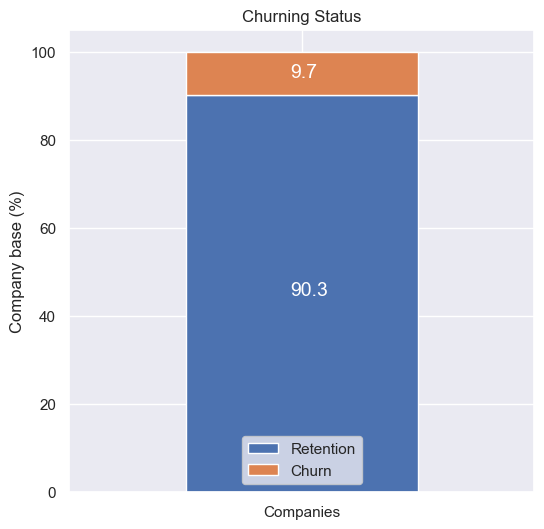

In [157]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

# plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right")
plot_stacked_bars(churn_percentage.transpose(), "Churning Status", (6, 6), legend_="lower center")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

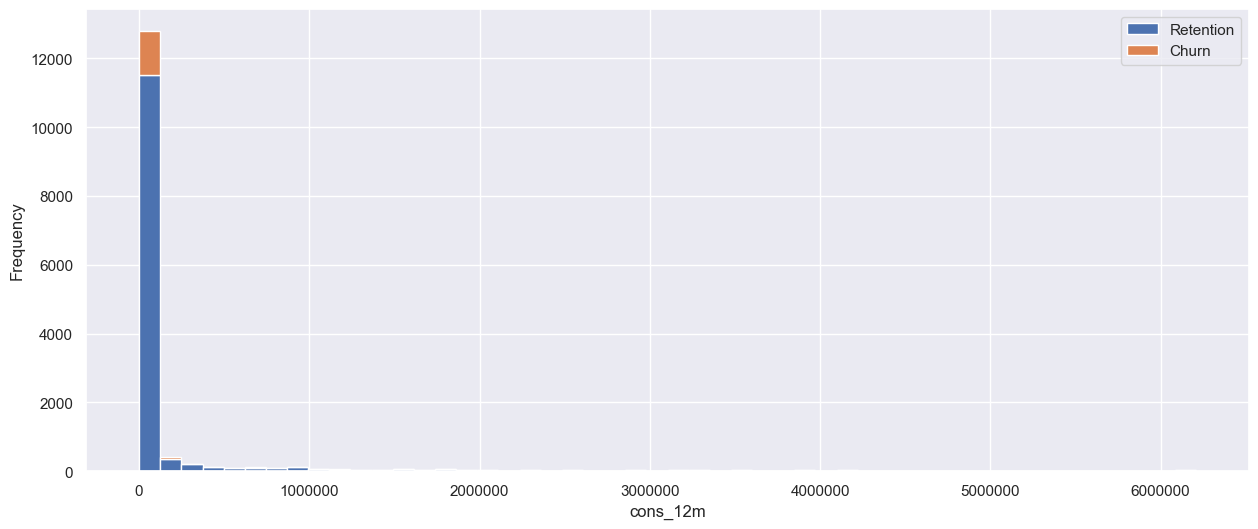

In [158]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(15, 6))

# plot_distribution(dataframe, column, ax, bins_=50)
plot_distribution(consumption, 'cons_12m', axs)

### Distribution of data

In [159]:
# Define numerical and categorical columns
client_num = client_df.select_dtypes(include=['float64', 'int64'])
client_cat = client_df.select_dtypes(include=['object'])

client_num_cols = client_num.columns
client_cat_cols = client_cat.columns

print('Numerical and categorical client data')
print(f'- Number of numerical features  : {len(client_num_cols)}')
print(f'- Number of categorical features: {len(client_cat_cols)}')

Numerical and categorical client data
- Number of numerical features  : 18
- Number of categorical features: 8


In [160]:
price_num = price_df.select_dtypes(include=['float64', 'int64'])
price_cat = price_df.select_dtypes(include=['object'])

price_num_cols = price_num.columns
price_cat_cols = price_cat.columns

print('Numerical and categorical price data')
print(f'- Number of numerical features  : {len(price_num_cols)}')
print(f'- Number of categorical features: {len(price_cat_cols)}')

Numerical and categorical price data
- Number of numerical features  : 6
- Number of categorical features: 2


#### Numerical Feature

##### Univariate Analysis

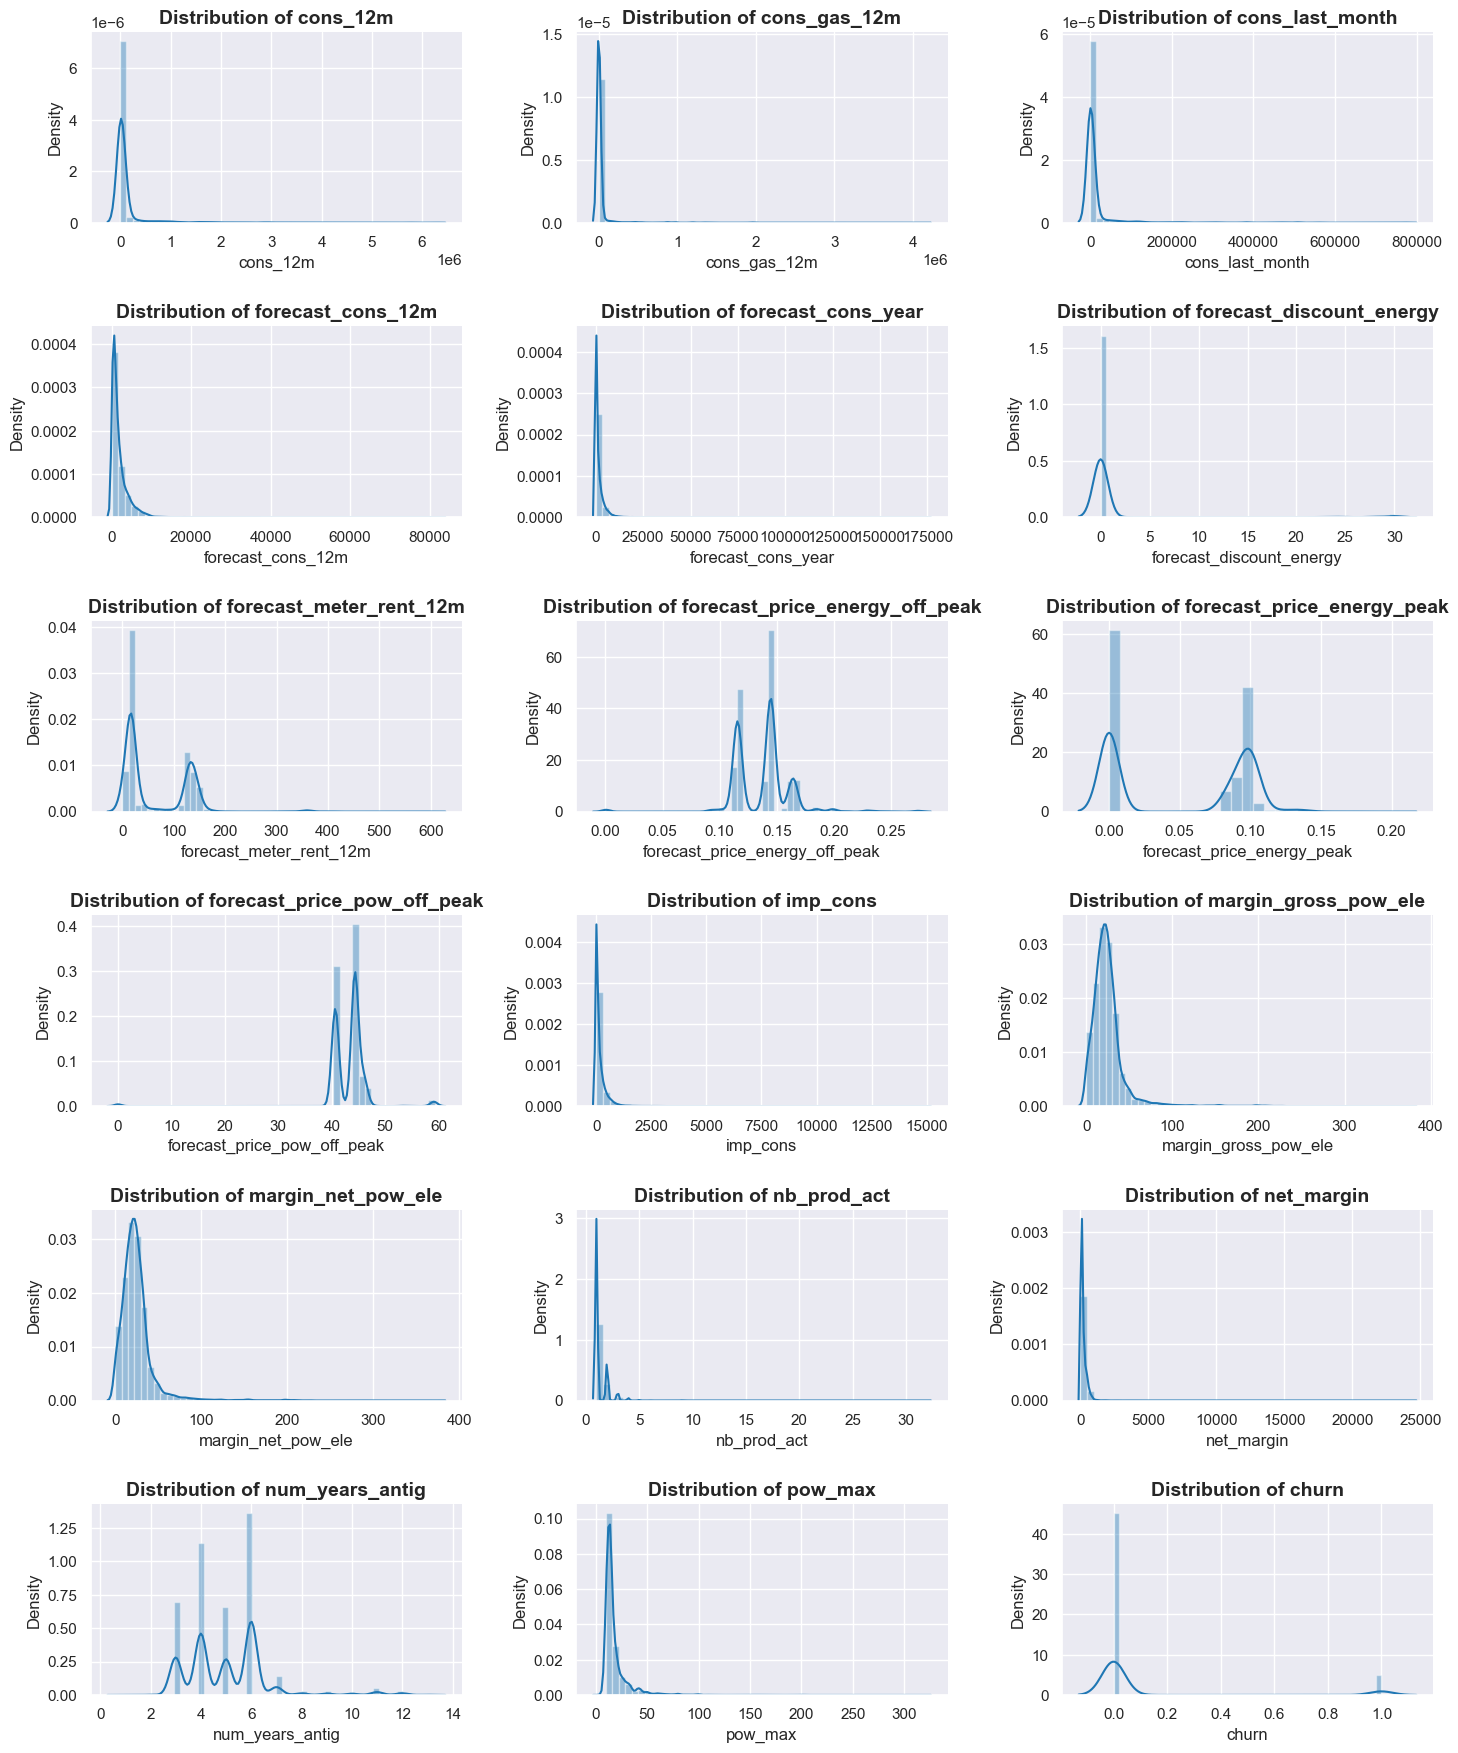

In [161]:
plt.figure(figsize=(15, 18))
for i in range(0, len(client_num_cols)):
    plt.subplot(6, 3, i + 1)
    sns.distplot(client_df[client_num_cols[i]], color='tab:blue')
    sns.despine()
    plt.title(f'Distribution of {client_num_cols[i]}', fontsize=14, weight='bold')
    plt.tight_layout(pad=2)

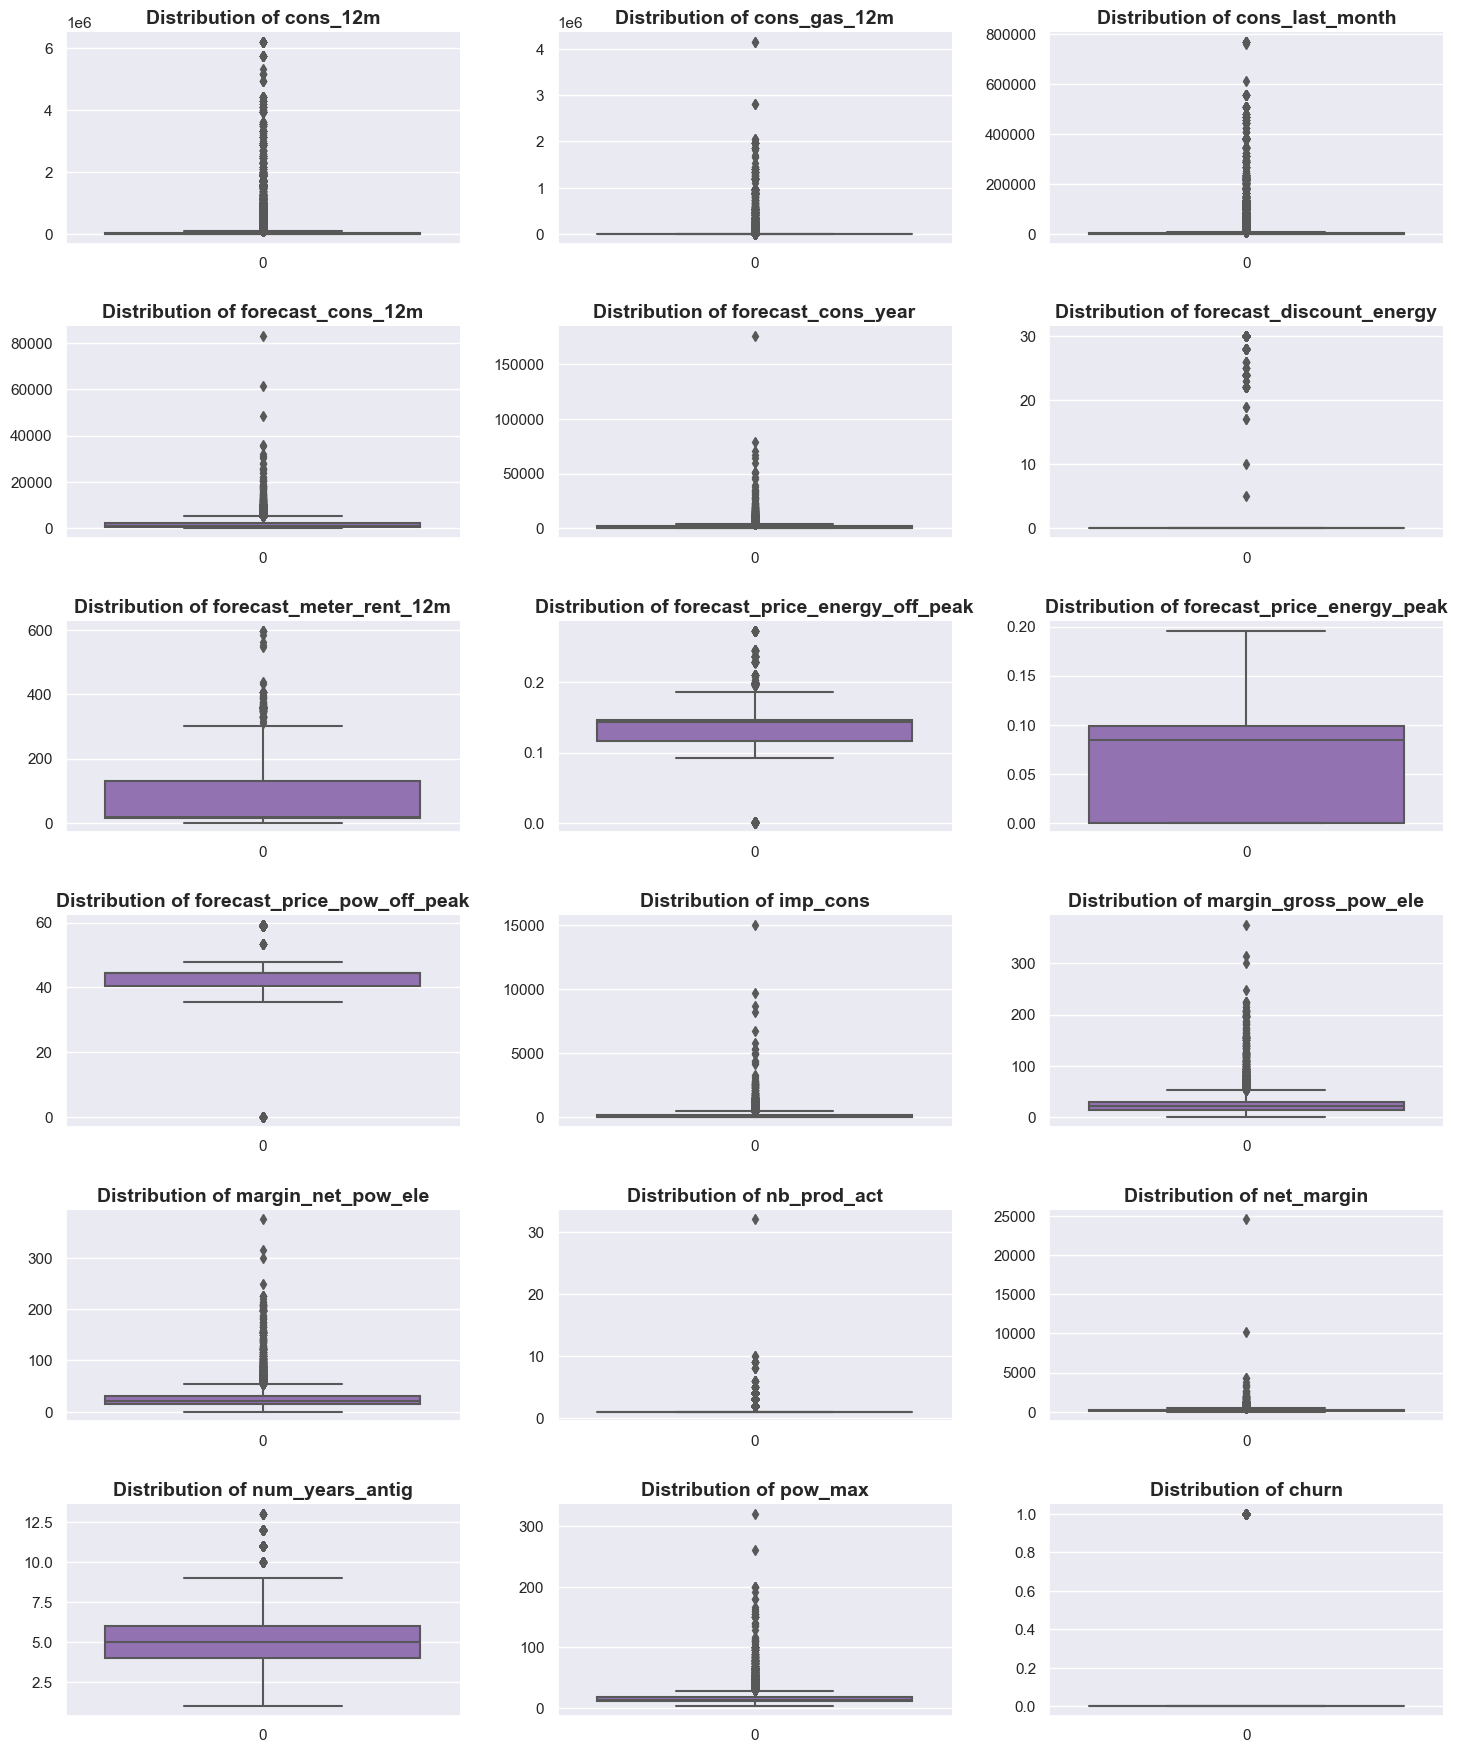

In [162]:
plt.figure(figsize=(15, 18))
for i in range(0, len(client_num_cols)):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(client_df[client_num_cols[i]], color='tab:purple')
    sns.despine()
    plt.title(f'Distribution of {client_num_cols[i]}', fontsize=14, weight='bold')
    plt.tight_layout(pad=2)

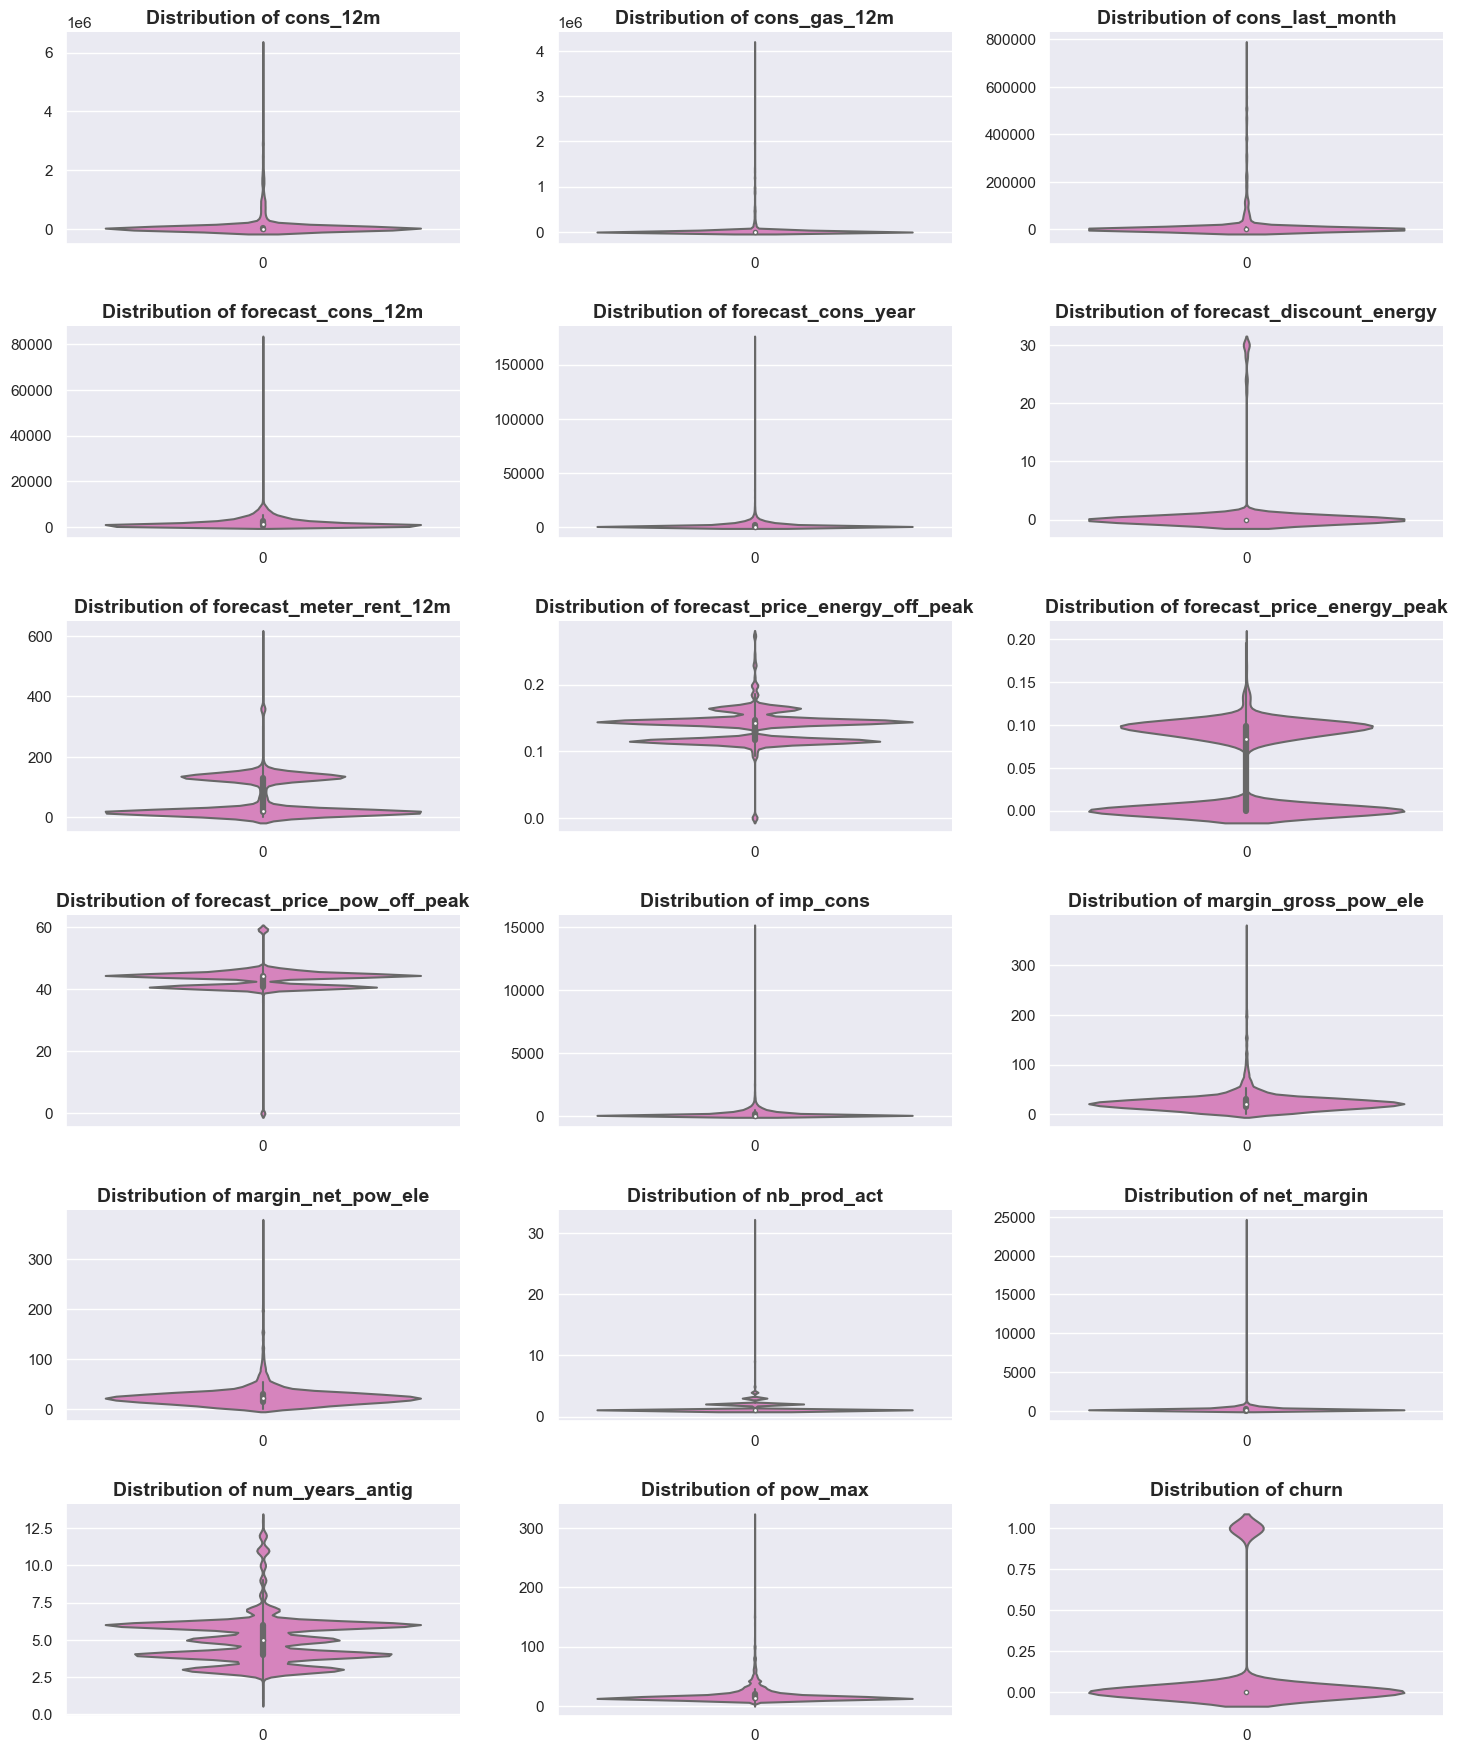

In [163]:
plt.figure(figsize=(15, 18))
for i in range(0, len(client_num_cols)):
    plt.subplot(6, 3, i + 1)
    sns.violinplot(client_df[client_num_cols[i]], color='tab:pink')
    sns.despine()
    plt.title(f'Distribution of {client_num_cols[i]}', fontsize=14, weight='bold')
    plt.tight_layout(pad=2)

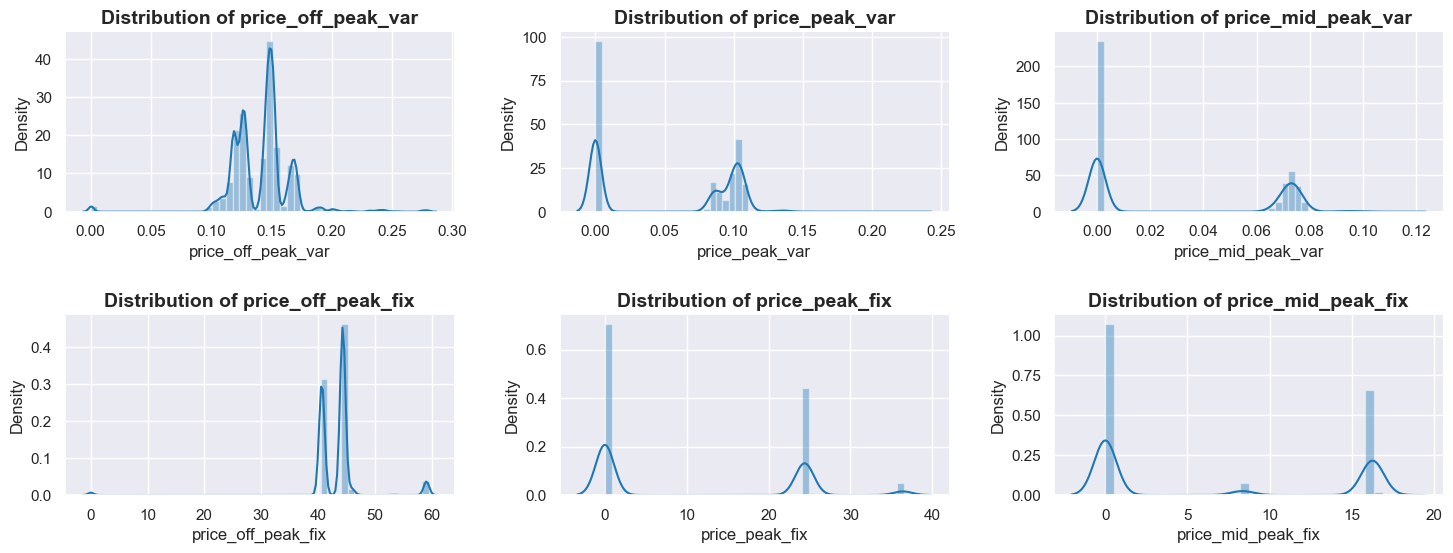

In [164]:
plt.figure(figsize=(15, 6))
for i in range(0, len(price_num_cols)):
    plt.subplot(2, 3, i + 1)
    sns.distplot(price_df[price_num_cols[i]], color='tab:blue')
    sns.despine()
    plt.title(f'Distribution of {price_num_cols[i]}', fontsize=14, weight='bold')
    plt.tight_layout(pad=2)

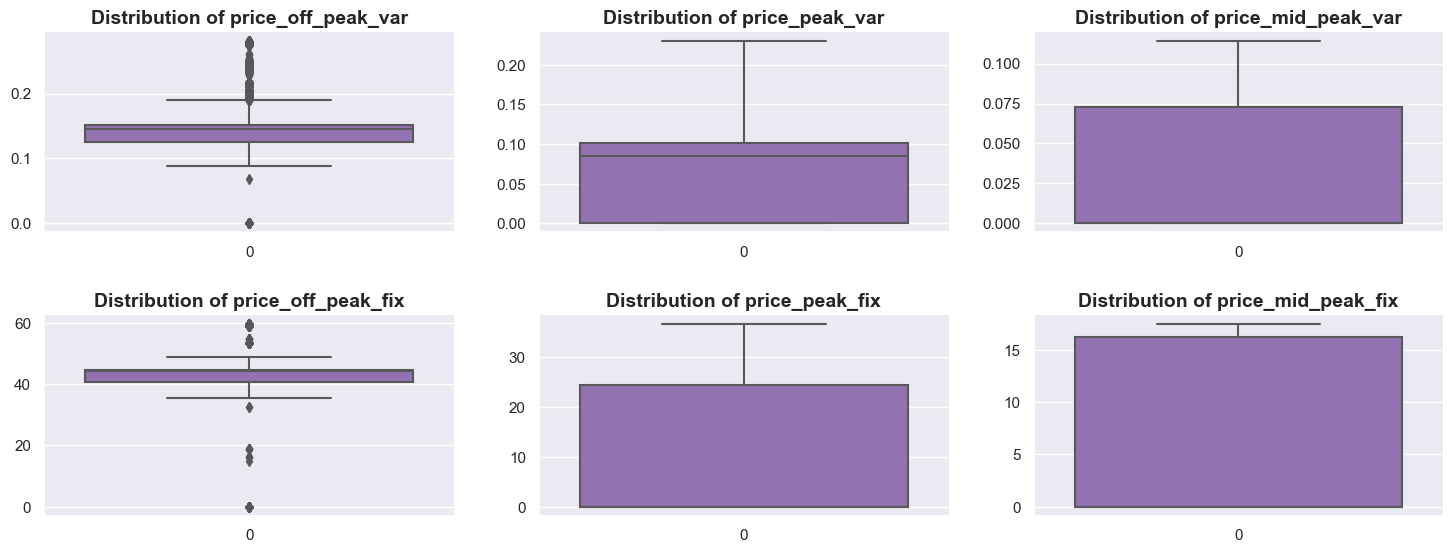

In [165]:
plt.figure(figsize=(15, 6))
for i in range(0, len(price_num_cols)):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(price_df[price_num_cols[i]], color='tab:purple')
    sns.despine()
    plt.title(f'Distribution of {price_num_cols[i]}', fontsize=14, weight='bold')
    plt.tight_layout(pad=2)

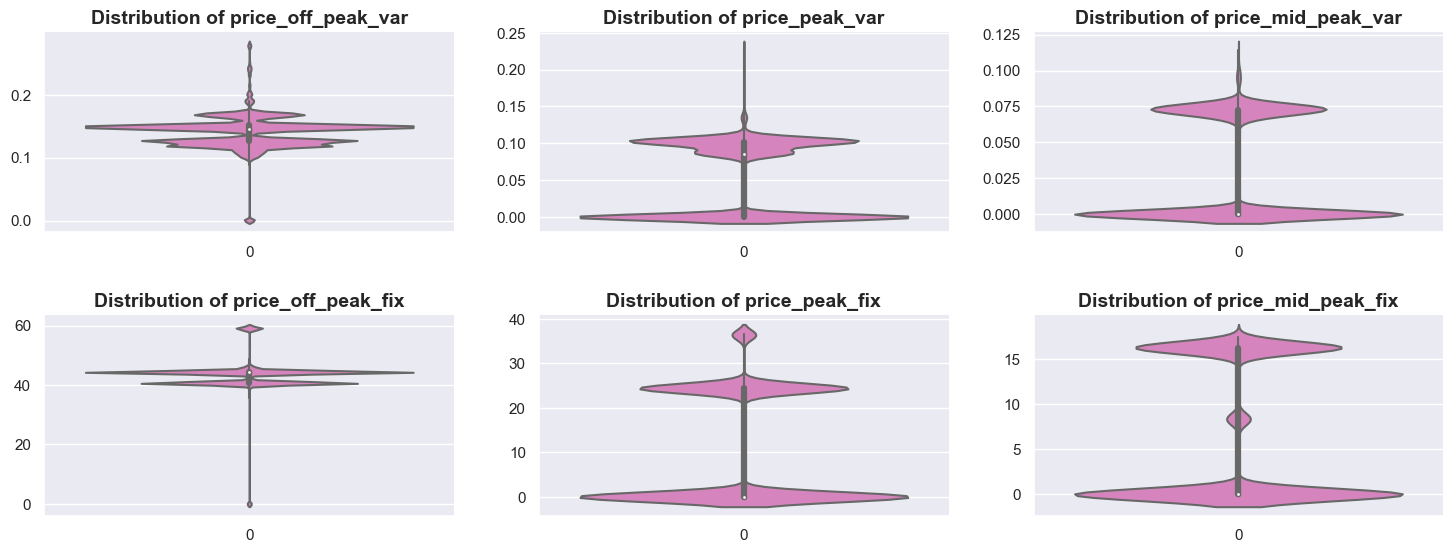

In [166]:
plt.figure(figsize=(15, 6))
for i in range(0, len(price_num_cols)):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(price_df[price_num_cols[i]], color='tab:pink')
    sns.despine()
    plt.title(f'Distribution of {price_num_cols[i]}', fontsize=14, weight='bold')
    plt.tight_layout(pad=2)

##### Multivariate Analysis

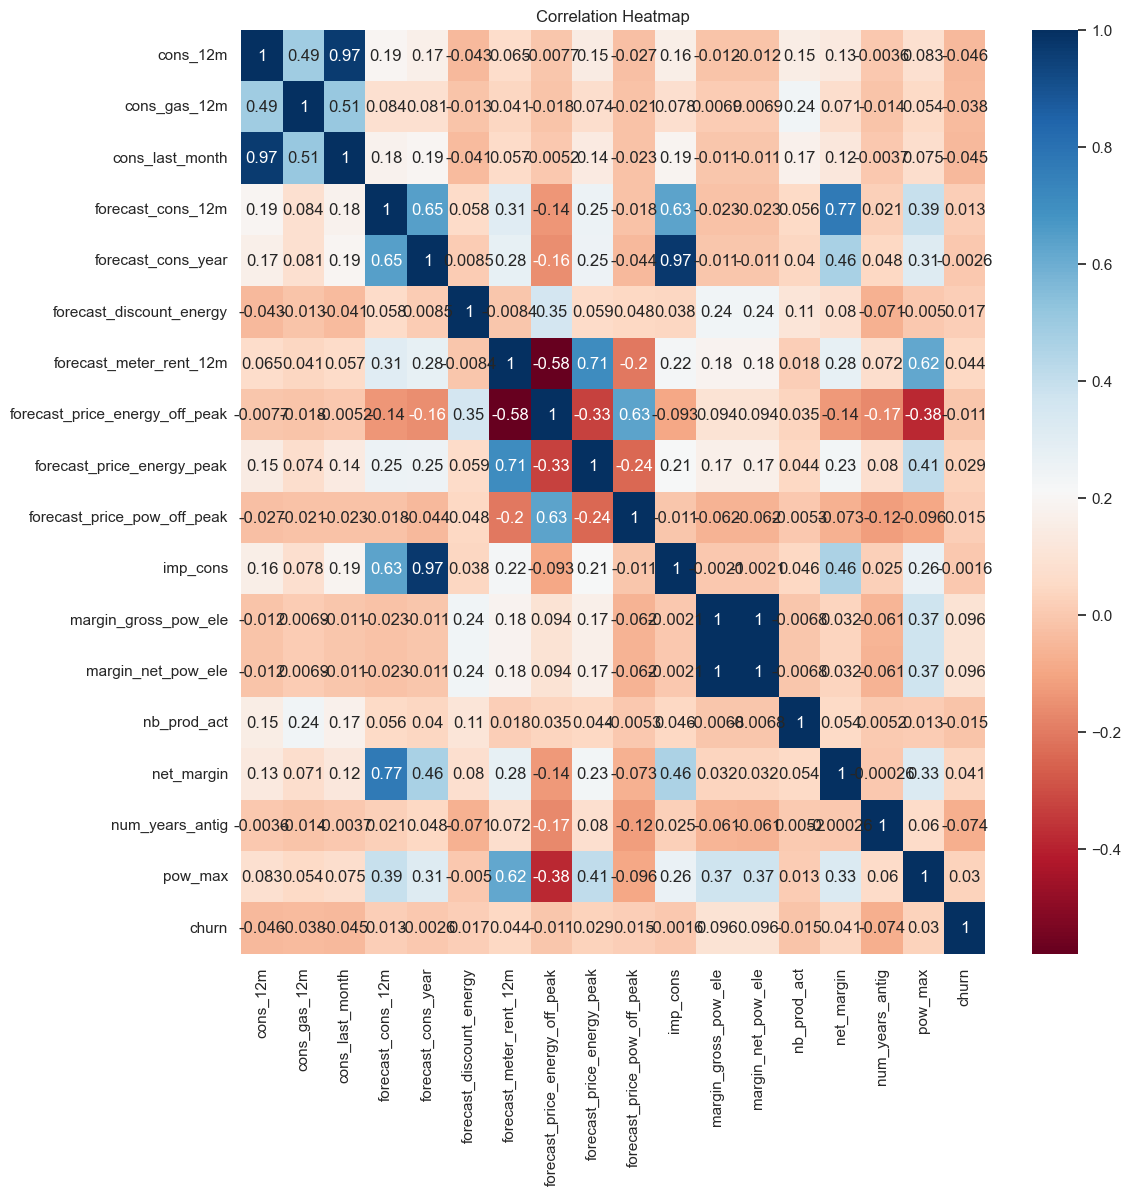

In [167]:
# Filter out only the numeric columns from client_df
client_num_df = client_df[client_num_cols]

# Explore correlations
corr_matrix = client_num_df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.show()

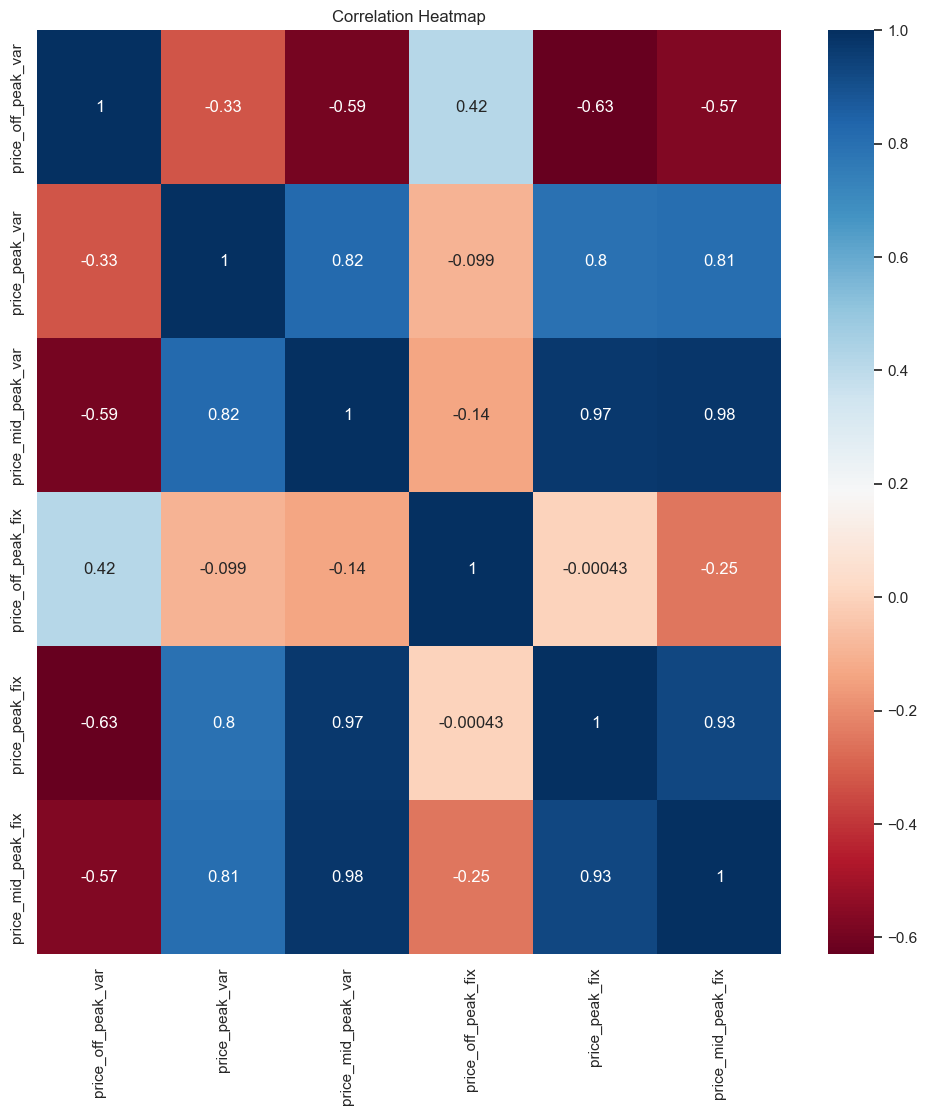

In [168]:
price_num_df = price_df[price_num_cols]

corr_matrix = price_num_df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.show()

#### Categorical Feature

##### Univariate Analysis

In [169]:
def categorical_distribution(cat):
    count = cat.describe().loc['count']
    top_freq = cat.describe().loc['freq']

    percentage = (top_freq / count) * 100
    percentage = percentage.astype(float)

    result = pd.concat([cat.describe().loc['top'], percentage], axis=1)
    result.columns = ['Top Frequent Value', 'Percentage (%)']

    return result.round(2).reset_index().rename(columns={'index': 'Feature Name'})

In [170]:
client_cat.describe().T

,count,unique,top,freq
id,14606,14606,24011ae4ebbe3035111d65fa7c15bc57,1
channel_sales,14606,8,foosdfpfkusacimwkcsosbicdxkicaua,6754
date_activ,14606,1796,2009-08-01,95
date_end,14606,368,2016-02-01,145
date_modif_prod,14606,2129,2015-11-01,721
date_renewal,14606,386,2015-06-23,587
has_gas,14606,2,f,11955
origin_up,14606,6,lxidpiddsbxsbosboudacockeimpuepw,7097


In [171]:
categorical_distribution(client_cat)

,Feature Name,Top Frequent Value,Percentage (%)
0,id,24011ae4ebbe3035111d65fa7c15bc57,0.01
1,channel_sales,foosdfpfkusacimwkcsosbicdxkicaua,46.24
2,date_activ,2009-08-01,0.65
3,date_end,2016-02-01,0.99
4,date_modif_prod,2015-11-01,4.94
5,date_renewal,2015-06-23,4.02
6,has_gas,f,81.85
7,origin_up,lxidpiddsbxsbosboudacockeimpuepw,48.59


In [172]:
price_cat.describe().T

,count,unique,top,freq
id,193002,16096,038af19179925da21a25619c5a24b745,12
price_date,193002,12,2015-08-01,16094


In [173]:
categorical_distribution(price_cat)

,Feature Name,Top Frequent Value,Percentage (%)
0,id,038af19179925da21a25619c5a24b745,0.01
1,price_date,2015-08-01,8.34


In [174]:
price_df['price_date'].value_counts(normalize=True)

price_date
2015-08-01    0.083388
2015-12-01    0.083388
2015-07-01    0.083367
2015-11-01    0.083351
2015-06-01    0.083341
2015-10-01    0.083341
2015-02-01    0.083326
2015-09-01    0.083326
2015-05-01    0.083315
2015-04-01    0.083310
2015-03-01    0.083284
2015-01-01    0.083263
Name: proportion, dtype: float64

In [175]:
def plot_cat_univar(x, feature_name):
    plt.figure(figsize=(10, 6))
    sns.set(style='white', palette='tab10')

    sns.countplot(x=x)
    sns.despine()
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature_name}', fontsize=14, weight='bold')

    plt.show()

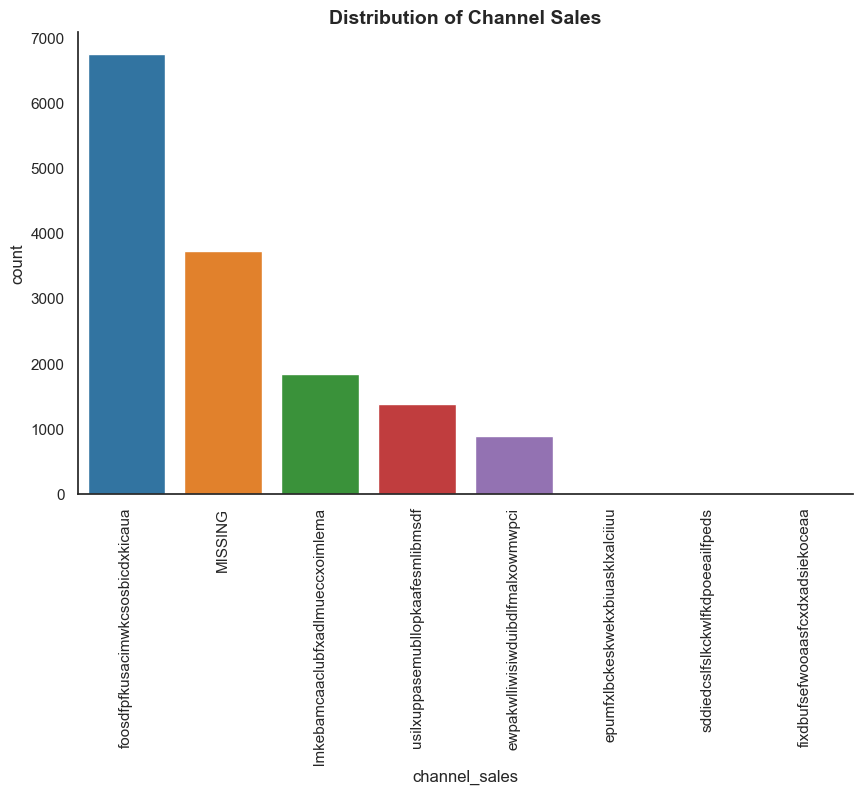

In [176]:
plot_cat_univar(client_df['channel_sales'], 'Channel Sales')

In [177]:
client_df['channel_sales'].value_counts(normalize=True).round(3)

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    0.462
MISSING                             0.255
lmkebamcaaclubfxadlmueccxoimlema    0.126
usilxuppasemubllopkaafesmlibmsdf    0.094
ewpakwlliwisiwduibdlfmalxowmwpci    0.061
sddiedcslfslkckwlfkdpoeeailfpeds    0.001
epumfxlbckeskwekxbiuasklxalciiuu    0.000
fixdbufsefwooaasfcxdxadsiekoceaa    0.000
Name: proportion, dtype: float64

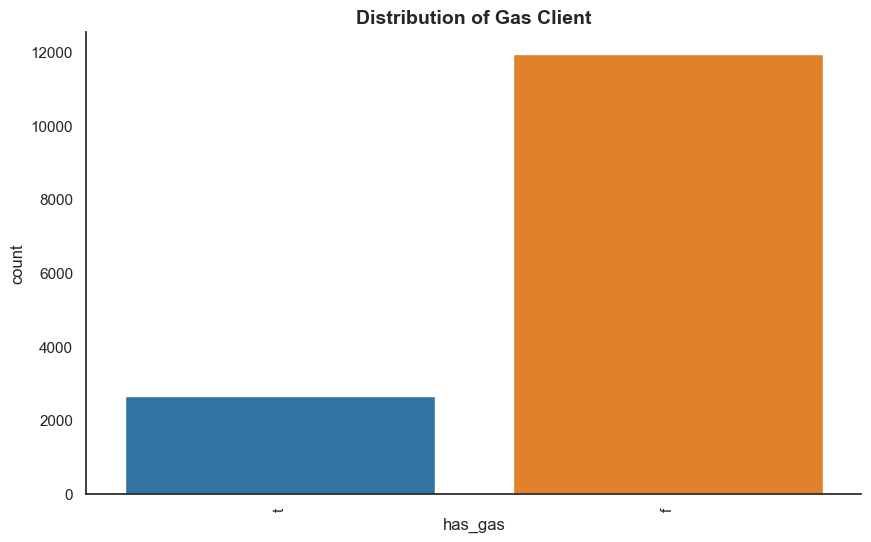

In [178]:
plot_cat_univar(client_df['has_gas'], 'Gas Client')

In [179]:
client_df['has_gas'].value_counts(normalize=True).round(3)

has_gas
f    0.818
t    0.182
Name: proportion, dtype: float64

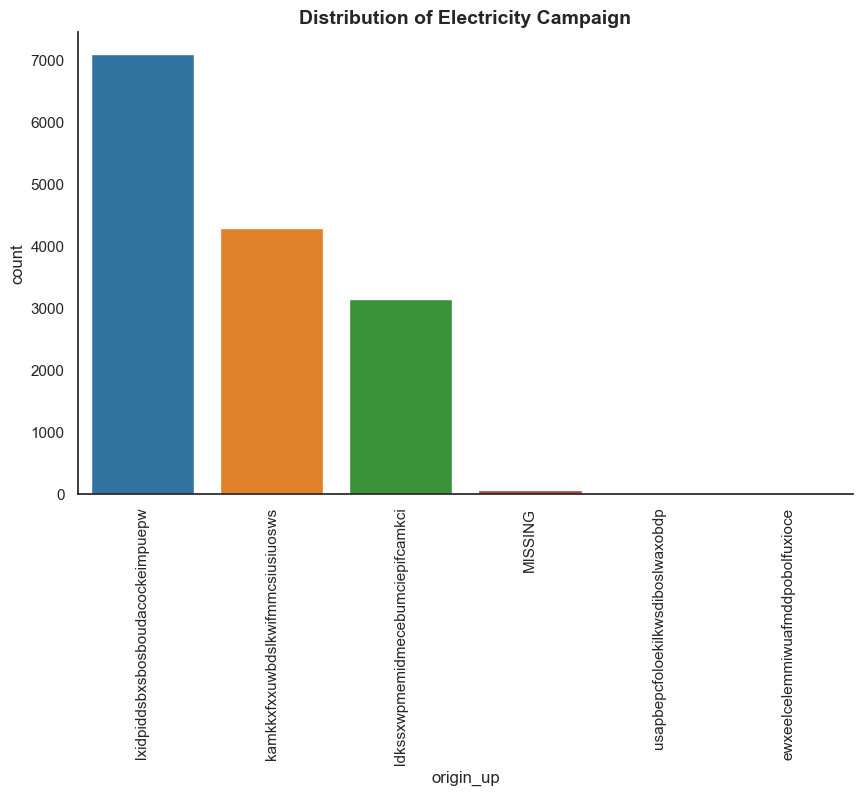

In [180]:
plot_cat_univar(client_df['origin_up'], 'Electricity Campaign')

In [181]:
client_df['origin_up'].value_counts(normalize=True).round(3)

origin_up
lxidpiddsbxsbosboudacockeimpuepw    0.486
kamkkxfxxuwbdslkwifmmcsiusiuosws    0.294
ldkssxwpmemidmecebumciepifcamkci    0.216
MISSING                             0.004
usapbepcfoloekilkwsdiboslwaxobdp    0.000
ewxeelcelemmiwuafmddpobolfuxioce    0.000
Name: proportion, dtype: float64

#### Target Feature

In [182]:
target = client_df['churn']
percent_target = target.value_counts(normalize=True).round(3)
percent_target

churn
0    0.903
1    0.097
Name: proportion, dtype: float64

In [183]:
percent_negative = percent_target[0] * 100 # Retention
percent_positive = percent_target[1] * 100 # Churn

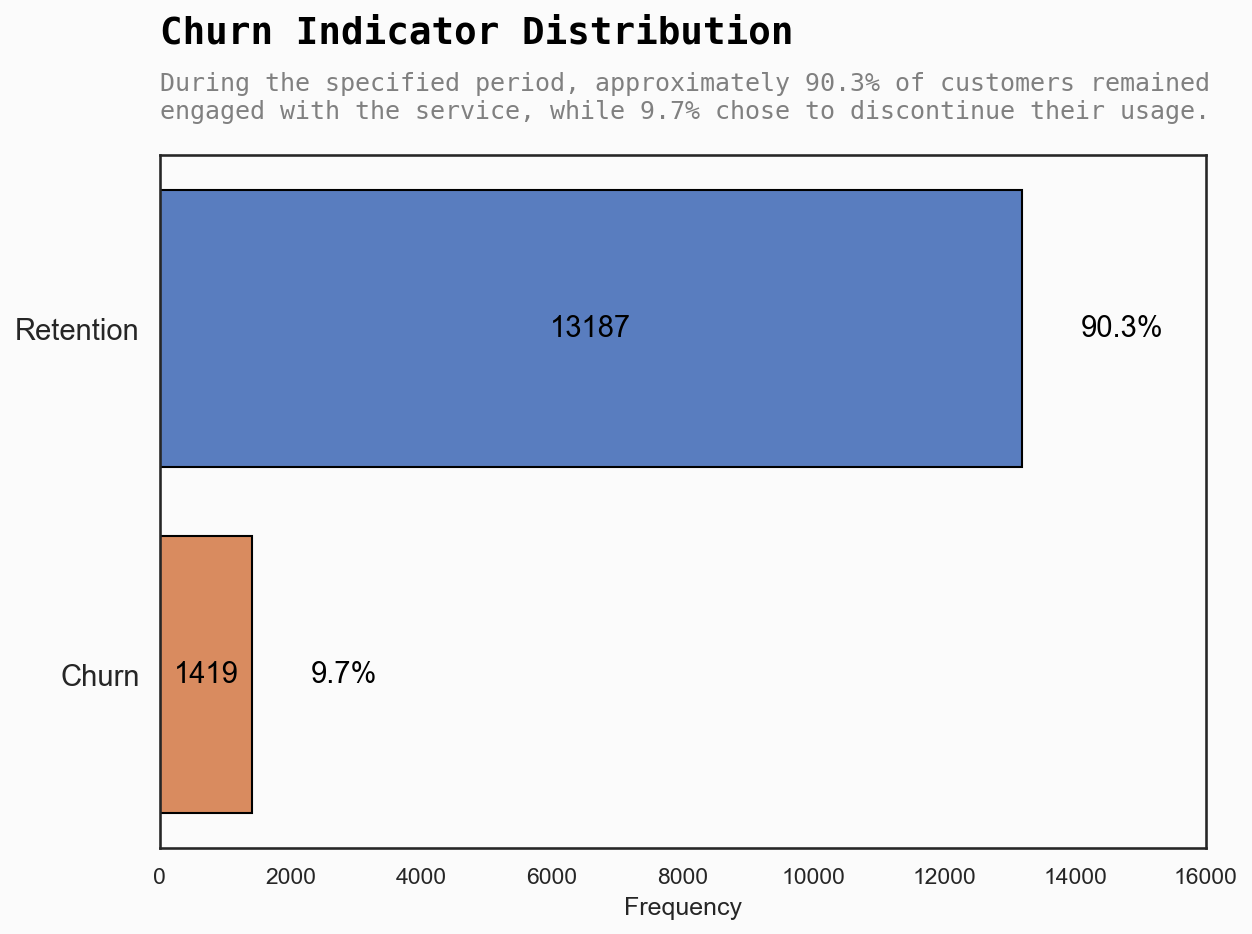

In [184]:
background = "#fbfbfb"
fig, ax = plt.subplots(figsize=(9, 6), dpi=150)
fig.patch.set_facecolor(background)
ax.set_facecolor(background)

sns.set(style='white', palette='muted')
sns.countplot(y=target, data=client_df, ax=ax, edgecolor='black')

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'),
                (p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                va='center', ha='center',
                xytext=(0, 0),
                textcoords='offset points', fontsize=14, color='black')

total = float(len(target))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_width() + 900
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='left', va='center', fontsize=14, color='black')

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_axisbelow(True)
ax.set_xlabel('Frequency')
ax.set_xlim(0, 16000)
ax.set_ylabel('')
ax.set_yticklabels(['Retention', 'Churn'], fontsize=14)
ax.text(0, Yend - 0.325, 'Churn Indicator Distribution', fontsize=18, fontweight='bold', fontfamily='monospace', color='black')
ax.text(0, Yend - 0.025,
'''
During the specified period, approximately 90.3% of customers remained
engaged with the service, while 9.7% chose to discontinue their usage.
''', fontsize=12, fontweight='light', fontfamily='monospace', color='gray')

plt.show()

- During the specified period, approximately 90.3% of customers remained
engaged with the service, while 9.7% chose to discontinue their usage.
- **Business Impact**: A churn rate of 9.7% might be considered relatively low, suggesting that the company is successful in retaining a significant portion of its customers.
- **Opportunity**: While a 9.7% churn rate is relatively low, there is still an opportunity to improve customer retention. Identifying reasons for churn and implementing strategies to address those reasons could further reduce the churn rate.

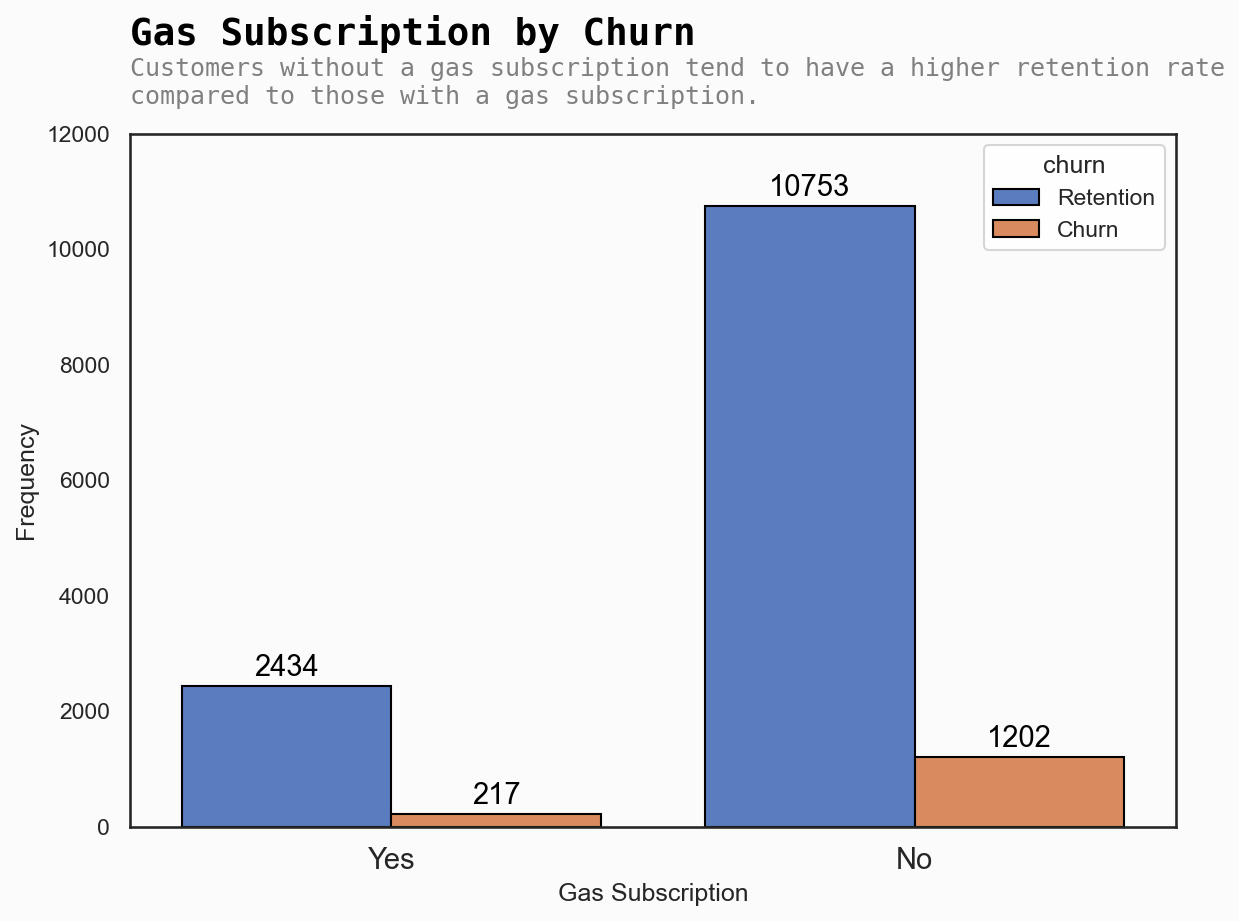

In [185]:
background = "#fbfbfb"
fig, ax = plt.subplots(figsize=(9, 6), dpi=150)
fig.patch.set_facecolor(background)
ax.set_facecolor(background)

sns.set(style='white', palette='muted')
sns.countplot(x='has_gas',
              hue=target.replace({0: 'Retention', 1: 'Churn'}),
              hue_order=['Retention', 'Churn'],
              data=client_df,
              edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points', ha='center',
                fontsize=14, color='black')
    
Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_axisbelow(True)
ax.set_xlabel('Gas Subscription', fontsize=12)
ax.set_xticklabels(['Yes', 'No'], fontsize=14)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_ylim(0, 12000)
ax.text(-0.5, Yend + 2250, 'Gas Subscription by Churn', fontsize=18, fontweight='bold', fontfamily='monospace', color='black')
ax.text(-0.5, Yend + 750,
'''
Customers without a gas subscription tend to have a higher retention rate
compared to those with a gas subscription.
''', fontsize=12, fontweight='light', fontfamily='monospace', color='gray')

# plt.title('Client Gas by Churn', fontsize=18, fontweight='bold', fontfamily='monospace', color='black', loc='left')
plt.show()

In [186]:
client_df.groupby('has_gas')['churn'].value_counts().round(3)

has_gas  churn
f        0        10753
         1         1202
t        0         2434
         1          217
Name: count, dtype: int64

In [187]:
client_df.groupby('has_gas')['churn'].value_counts(normalize=True).round(3)

has_gas  churn
f        0        0.899
         1        0.101
t        0        0.918
         1        0.082
Name: proportion, dtype: float64

- Impact of Gas Subscription on Churn
    - Among customers without a gas subscription (`No`), around 89.9% or 10,753 of them continue using the service, while approximately 10.1% or 1,202 of them switch providers (`Churn`).
    - For customers with a gas subscription (`Yes`), about 91.8% or 2,434 of them continue using the service, and roughly 8.2% or 217 of them switch providers.
- Gas Subscription and Churn Rate
    - Customers without gas subscription tend to have a higher retention rate.
    - This suggests that customers with a gas subscription are slightly less likely to switch to other services, implying that gas subscription influences customer churn behavior.

### Price Sensitivity Analysis

References:
- Yang, S. (2020, October 2). Pricing research — Van Westendorp’s Price Sensitivity Meter in Python. Survey design and analysis in Python. Retrieved from https://sophiamyang.github.io/DS/othermodels/price_sensitivity.html
- Price Intelligently. (2022, April 4). Price Sensitivity, What is it and How is it Measured? Retrieved from https://www.paddle.com/blog/price-sensitivity
- Serdar, E. (n.d.). Price sensitivity: What it is and how to calculate it. Retrieved from https://wynter.com/post/price-sensitivity
- Unknown. (n.d.). How to measure price sensitivity. Retrieved from https://www.surveymonkey.com/market-research/resources/how-to-measure-price-sensitivity

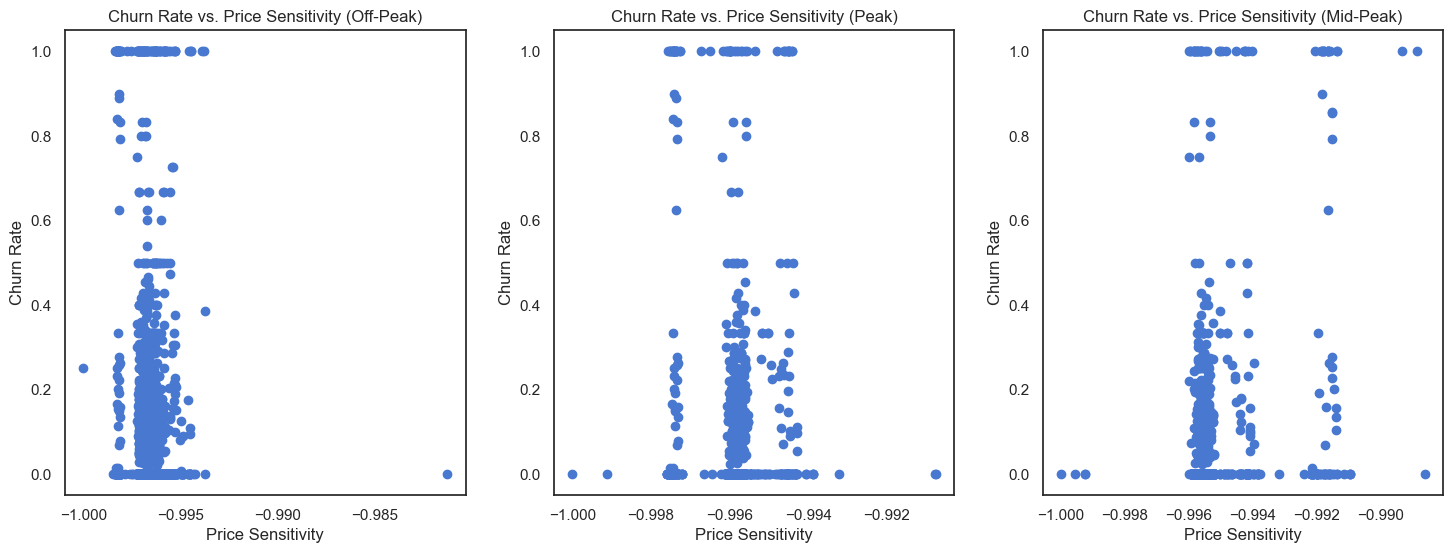

In [188]:
# Calculate price sensitivity (e.g., percentage change in pricing)
price_df['price_off_peak_sensitivity'] = (price_df['price_off_peak_var'] - price_df['price_off_peak_fix']) / price_df['price_off_peak_fix']
price_df['price_peak_sensitivity'] = (price_df['price_peak_var'] - price_df['price_peak_fix']) / price_df['price_peak_fix']
price_df['price_mid_peak_sensitivity'] = (price_df['price_mid_peak_var'] - price_df['price_mid_peak_fix']) / price_df['price_mid_peak_fix']

# Merge customer and pricing data
merged_data = client_df.merge(price_df, on='id', how='inner')

# Calculate churn rates for different price sensitivity levels
off_peak_sensitivity_churn = merged_data.groupby('price_off_peak_sensitivity')['churn'].mean()
peak_sensitivity_churn = merged_data.groupby('price_peak_sensitivity')['churn'].mean()
mid_peak_sensitivity_churn = merged_data.groupby('price_mid_peak_sensitivity')['churn'].mean()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Plot churn rates for different price sensitivity levels
axes[0].scatter(off_peak_sensitivity_churn.index, off_peak_sensitivity_churn.values)
axes[0].set_title('Churn Rate vs. Price Sensitivity (Off-Peak)')
axes[0].set_xlabel('Price Sensitivity')
axes[0].set_ylabel('Churn Rate')

axes[1].scatter(peak_sensitivity_churn.index, peak_sensitivity_churn.values)
axes[1].set_title('Churn Rate vs. Price Sensitivity (Peak)')
axes[1].set_xlabel('Price Sensitivity')
axes[1].set_ylabel('Churn Rate')

axes[2].scatter(mid_peak_sensitivity_churn.index, mid_peak_sensitivity_churn.values)
axes[2].set_title('Churn Rate vs. Price Sensitivity (Mid-Peak)')
axes[2].set_xlabel('Price Sensitivity')
axes[2].set_ylabel('Churn Rate')

plt.tight_layout(pad=2)
plt.show()